In [100]:
import numpy as np
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "3"
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Train dataset used for our analysis

In [101]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [102]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [103]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [104]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [105]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [106]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [107]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [108]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [109]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [110]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [111]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [112]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [114]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


## k-nearest neighbors

In [148]:
knn = neighbors.KNeighborsClassifier()

In [149]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [150]:
knn.score(X_test,Y_test)

0.9122807017543859

In [151]:
knn.score(X_train, Y_train)

0.9538461538461539

Training Accuracy: 0.9538461538461539
Test Accuracy: 0.9122807017543859


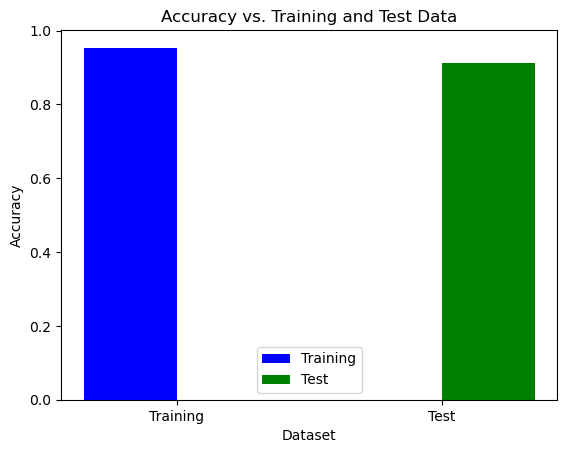

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors

# Assuming you have already defined X_train, Y_train, X_test, and Y_test

# Initialize and fit the KNN classifier
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Calculate accuracy for training and test data
train_accuracy = knn.score(X_train, Y_train)
test_accuracy = knn.score(X_test, Y_test)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot bar graph with different colors for training and test data
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(2)

train_bar = ax.bar(index, [train_accuracy, 0], bar_width, label='Training', color='b')
test_bar = ax.bar(index + bar_width, [0, test_accuracy], bar_width, label='Test', color='g')

ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. Training and Test Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Training', 'Test'])
ax.legend()

plt.show()


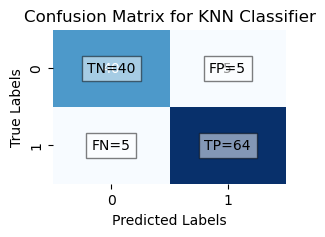

In [153]:
import seaborn as sns
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Predictions on the test data
Y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate true negatives and false negatives
tn, fp, fn, tp = cm.ravel()

# Add true negatives and false negatives to the confusion matrix
plt.text(0.5, 0.5, f'TN={tn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 0.5, f'FP={fp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.5, 1.5, f'FN={fn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 1.5, f'TP={tp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


## Naïve Bayes

Training Accuracy = 0.9362637362637363, Test Accuracy = 0.9385964912280702


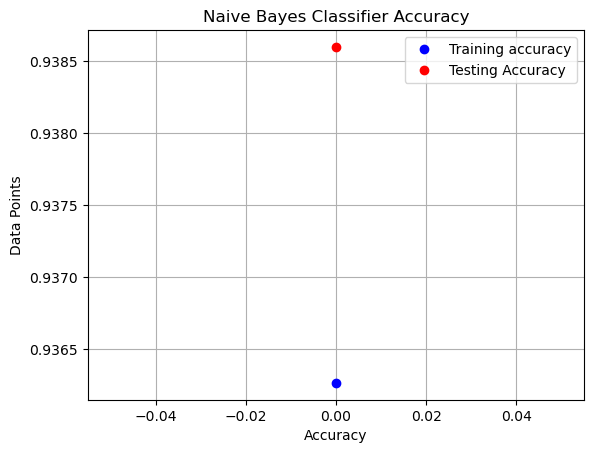

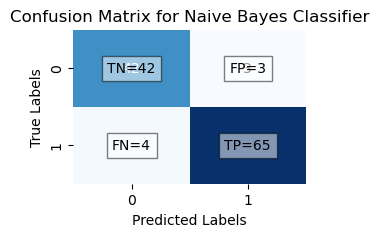

In [154]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
training_accuracy_nb = []
test_accuracy_nb = []

# Assuming X_train, X_test, Y_train, and Y_test are defined elsewhere
# X_train, X_test: feature matrices
# Y_train, Y_test: target vectors
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Assuming Gaussian Naive Bayes is used
nb = GaussianNB()

nb.fit(X_train, Y_train)

training_accuracy_nb.append(nb.score(X_train, Y_train))
test_accuracy_nb.append(nb.score(X_test, Y_test))
print(f"Training Accuracy = {training_accuracy_nb[-1]}, Test Accuracy = {test_accuracy_nb[-1]}")

plt.plot(range(1), training_accuracy_nb, 'bo', label="Training accuracy")
plt.plot(range(1), test_accuracy_nb, 'ro', label="Testing Accuracy")
plt.legend()
plt.title("Naive Bayes Classifier Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Data Points")
plt.grid(True)  # Add grid
plt.show()

# Predictions on the test data
Y_pred = nb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate true negatives and false negatives
tn, fp, fn, tp = cm.ravel()

# Add true negatives and false negatives to the confusion matrix
plt.text(0.5, 0.5, f'TN={tn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 0.5, f'FP={fp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.5, 1.5, f'FN={fn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 1.5, f'TP={tp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


## RandomForestClassifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

mean_score = rf.score(X_test, Y_test)
print("Mean Score of Random Forest:", mean_score)

Mean Score of Random Forest: 0.9385964912280702


In [156]:
 rf.score(X_train, Y_train)

1.0

Training Accuracy: 1.0
Test Accuracy: 0.9473684210526315


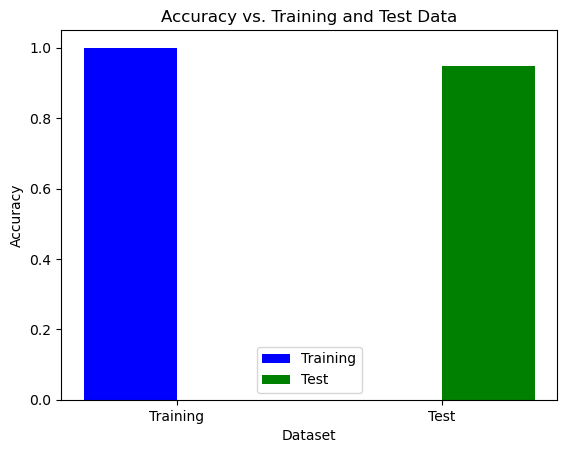

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already defined X_train, Y_train, X_test, and Y_test

# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Calculate accuracy for training and test data
train_accuracy = rf.score(X_train, Y_train)
test_accuracy = rf.score(X_test, Y_test)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot bar graph with different colors for training and test data
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(2)

train_bar = ax.bar(index, [train_accuracy, 0], bar_width, label='Training', color='b')
test_bar = ax.bar(index + bar_width, [0, test_accuracy], bar_width, label='Test', color='g')

ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. Training and Test Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Training', 'Test'])
ax.legend()

plt.show()


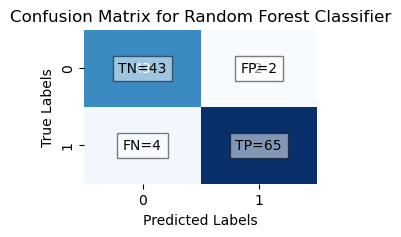

In [158]:
# Predictions on the test data
Y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate true negatives and false negatives
tn, fp, fn, tp = cm.ravel()

# Add true negatives and false negatives to the confusion matrix
plt.text(0.5, 0.5, f'TN={tn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 0.5, f'FP={fp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.5, 1.5, f'FN={fn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 1.5, f'TP={tp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


## LogisticRegression

In [159]:
log_reg = LogisticRegression()

In [160]:
# training the Logistic Regression model using Training data
log_reg.fit(X_train, Y_train)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
# accuracy on training data
X_train_prediction = log_reg.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [162]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9494505494505494


In [163]:
X_test_prediction = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [164]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9210526315789473


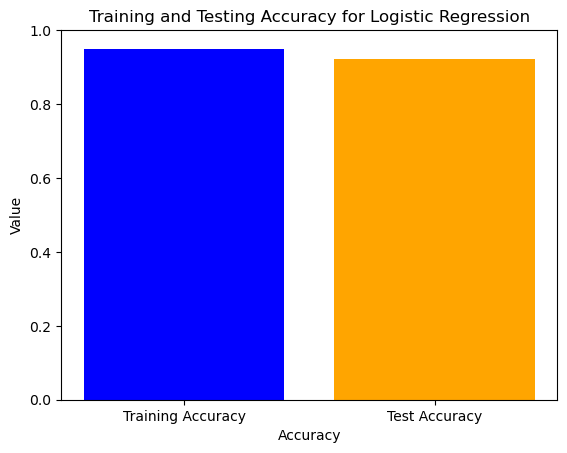

In [165]:
accuracies = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Training and Testing Accuracy for Logistic Regression')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for accuracy
plt.show()

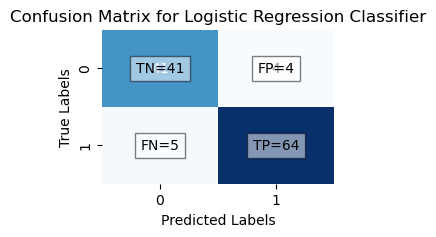

In [166]:
Y_pred = log_reg.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate true negatives and false negatives
tn, fp, fn, tp = cm.ravel()

# Add true negatives and false negatives to the confusion matrix
plt.text(0.5, 0.5, f'TN={tn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 0.5, f'FP={fp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.5, 1.5, f'FN={fn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 1.5, f'TP={tp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

## DecisionTreeClassifier

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import sklearn.datasets
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
X = breast_cancer_dataset.data
Y = breast_cancer_dataset.target
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
# Train the Decision Tree classifier
dt_classifier.fit(X_train, Y_train)
# Predict the labels for test set
Y_pred_test = dt_classifier.predict(X_test)
# Predict the labels for training set
Y_pred_train = dt_classifier.predict(X_train)
# Calculate accuracy on test data
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print("Accuracy on test data:", accuracy_test)
# Calculate accuracy on training data
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print("Accuracy on training data:", accuracy_train)


Accuracy on test data: 0.9210526315789473
Accuracy on training data: 1.0


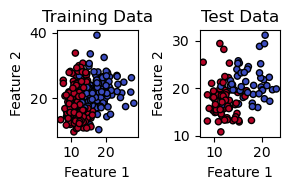

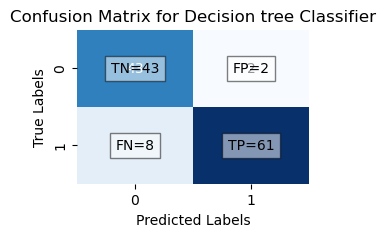

In [168]:
from sklearn.metrics import confusion_matrix

# Initialize and train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

# Predictions
Y_pred_train = dt_classifier.predict(X_train)
Y_pred_test = dt_classifier.predict(X_test)

# Line plot
plt.figure(figsize=(3, 2))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(Y_test,Y_pred_test )

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate true negatives and false negatives
tn, fp, fn, tp = cm.ravel()

# Add true negatives and false negatives to the confusion matrix
plt.text(0.5, 0.5, f'TN={tn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 0.5, f'FP={fp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.5, 1.5, f'FN={fn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 1.5, f'TP={tp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision tree Classifier')
plt.show()



## SVM

In [169]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC(kernel='linear')

# Train the SVM classifier
svm_model.fit(X_train, Y_train)

# Predict the labels for test set
Y_pred_test = svm_model.predict(X_test)

# Predict the labels for training set
Y_pred_train = svm_model.predict(X_train)

# Calculate accuracy on test data
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print("Accuracy on test data:", accuracy_test)

# Calculate accuracy on training data
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print("Accuracy on training data:", accuracy_train)


Accuracy on test data: 0.9473684210526315
Accuracy on training data: 0.9692307692307692


In [170]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

# Instantiate PCA with desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA model to data
pca.fit(X)

# Transform the data into the new feature space
X_pca = pca.transform(X)

# Print the original data and transformed data
print("Original Data:")
print(X)
print("\nTransformed Data (with", n_components, "components):")
print(X_pca)


Original Data:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Transformed Data (with 2 components):
[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


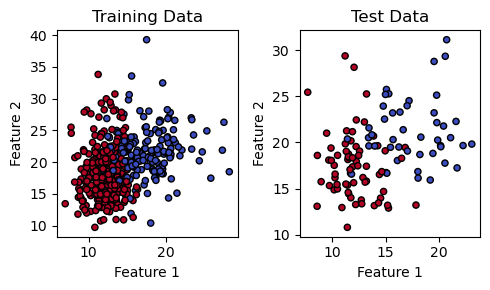

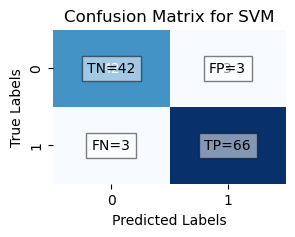

In [171]:
from sklearn.metrics import confusion_matrix

# Line plot
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate true negatives and false negatives
tn, fp, fn, tp = cm.ravel()

# Add true negatives and false negatives to the confusion matrix
plt.text(0.5, 0.5, f'TN={tn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 0.5, f'FP={fp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.5, 1.5, f'FN={fn}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.5, 1.5, f'TP={tp}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

## PCA

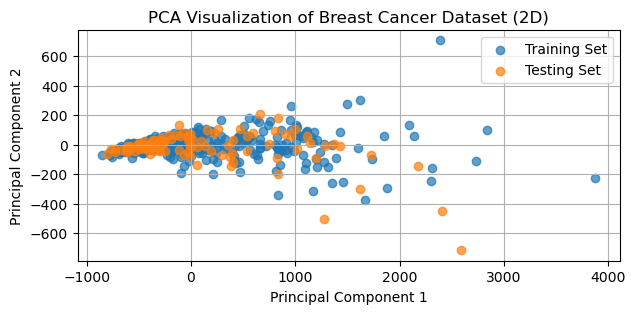

In [172]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Apply PCA dimensionality reduction (replace n_components with desired number of components)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Create line plots for the first two principal components
plt.figure(figsize=(7, 3))

# Plot training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label="Training Set", alpha=0.7)

# Plot testing data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], label="Testing Set", alpha=0.7)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Breast Cancer Dataset (2D)")
plt.legend()

plt.grid(True)
plt.show()


In [173]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression  # Assuming classification
from sklearn.datasets import load_breast_cancer

# Apply PCA dimensionality reduction (replace n_components with desired number)
pca = PCA(n_components=2)  # Reduce to 2 dimensions (no line plot here)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the PCA-reduced data (e.g., Logistic Regression)
clf = LogisticRegression()
clf.fit(X_train_pca, Y_train)

# Make predictions on the testing set using PCA-reduced data
Y_pred = clf.predict(X_test_pca)

# Calculate accuracy (replace with other desired metrics like precision, recall, F1-score)
accuracy = clf.score(X_test_pca, Y_test)

# Confusion Matrix
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(confusion_matrix_result)

# Print accuracy (or other metrics)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix:
[[40  5]
 [ 6 63]]
Accuracy: 0.9035


## Ridge regression

In [174]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the breast cancer dataset
breast_cancer_dataset = load_breast_cancer()
X = breast_cancer_dataset.data
Y = breast_cancer_dataset.target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Train a ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


Mean Squared Error: 0.06822597229898224


In [175]:
import matplotlib.pyplot as plt  # Not used for linear regression line plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer_dataset = load_breast_cancer()
X = breast_cancer_dataset.data
Y = breast_cancer_dataset.target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Train a linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = lin_reg_model.predict(X_test)

# Calculate mean squared error (MSE) and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Confusion matrix (not applicable for regression - removed)

# Note: While the breast cancer dataset is classification, 
# you requested regression. This code provides a linear regression example.


Mean Squared Error (MSE): 0.0685
R-squared: 0.7131


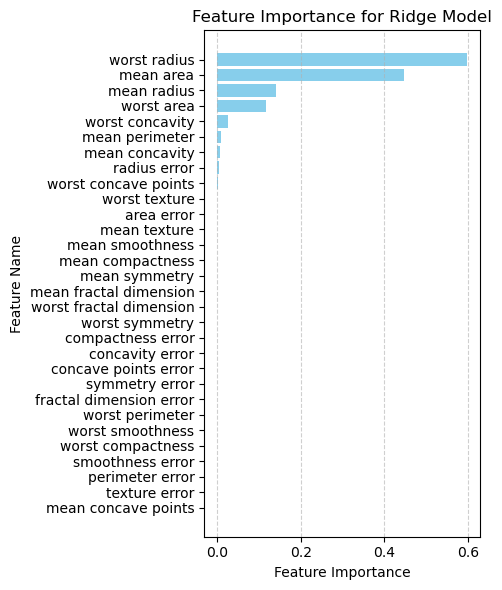

In [176]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
from sklearn.inspection import permutation_importance

# Load the breast cancer dataset
breast_cancer_dataset = load_breast_cancer()
X = breast_cancer_dataset.data
Y = breast_cancer_dataset.target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Train a ridge regression classifier
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, Y_train)

# Calculate permutation importance for feature ranking
results = permutation_importance(ridge_clf, X_test, Y_test, n_repeats=10, random_state=42)
feature_importances = results.importances_mean

# Sort features by importance
feature_names = breast_cancer_dataset.feature_names
sorted_idx = feature_importances.argsort()[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Visualize feature importance (example using bar chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Ridge Model')
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [177]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Initialize and train different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=10),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'PCA': make_pipeline(StandardScaler(), PCA(n_components=2)),
    'Ridge Regression': RidgeClassifier()
}

# Store evaluation metrics in a dictionary
metrics = {
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Sensitivity': [],
    'Accuracy': []
}

# Evaluate each classifier and store metrics
for name, clf in classifiers.items():
    if name == 'PCA':
        clf.fit(X_train)
        X_train_transformed = clf.transform(X_train)
        X_test_transformed = clf.transform(X_test)
        clf = LogisticRegression()
        clf.fit(X_train_transformed, Y_train)
        Y_pred = clf.predict(X_test_transformed)
    else:
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)

    metrics['Precision'].append(precision_score(Y_test, Y_pred))
    metrics['Recall'].append(recall_score(Y_test, Y_pred))
    metrics['F1-score'].append(f1_score(Y_test, Y_pred))
    metrics['Sensitivity'].append(recall_score(Y_test, Y_pred))
    metrics['Accuracy'].append(accuracy_score(Y_test, Y_pred))

# Create a DataFrame to display the metrics
df = pd.DataFrame(metrics, index=list(classifiers.keys()))
print(df)


                     Precision    Recall  F1-score  Sensitivity  Accuracy
Logistic Regression   0.941176  0.927536  0.934307     0.927536  0.921053
KNN                   0.927536  0.927536  0.927536     0.927536  0.912281
Random Forest         0.954545  0.913043  0.933333     0.913043  0.921053
Naive Bayes           0.955882  0.942029  0.948905     0.942029  0.938596
SVM                   0.902778  0.942029  0.921986     0.942029  0.903509
Decision Tree         0.984127  0.898551  0.939394     0.898551  0.929825
PCA                   0.940299  0.913043  0.926471     0.913043  0.912281
Ridge Regression      0.945205  1.000000  0.971831     1.000000  0.964912


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
from sklearn.pipeline import Pipeline

# Load the breast cancer dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

# Convert dataset into pandas DataFrame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
data_frame['label'] = breast_cancer_dataset.target
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "LogisticRegressionwith PCA": Pipeline([('pca', PCA(n_components=2)), ('logistic', LogisticRegression())]),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()}

# Train and evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    if 'PCA' in clf_name:
        Y_pred = clf.predict(X_test)
    else:
        Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    results[clf_name] = accuracy

# Print results
print("Accuracy Scores:")
for clf_name, accuracy in results.items():
    print(f"{clf_name}: {accuracy}")


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Scores:
Logistic Regression: 0.9210526315789473
LogisticRegressionwith PCA: 0.9035087719298246
Decision Tree: 0.9210526315789473
Naive Bayes: 0.9385964912280702
SVM: 0.9035087719298246
Random Forest: 0.9473684210526315
KNN: 0.9122807017543859


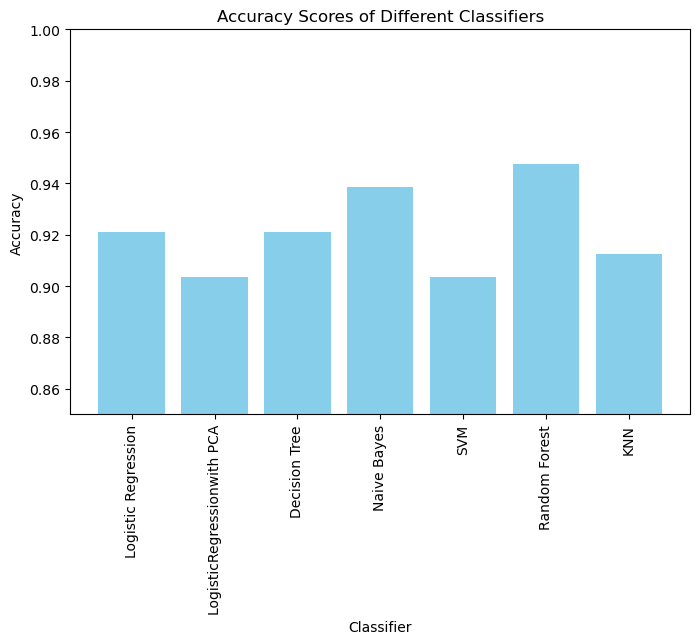

In [179]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)  # Adjust ylim for better visualization
plt.xticks(rotation=90)
plt.show()


## Prediction using RandomForestClassifier

In [180]:
import numpy as np
import pandas as pd
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
